In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [2]:
# Load the Dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
cate_col = [colm for colm in df.columns if df[colm].dtype == "O"]
cate_col

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [9]:
df[cate_col].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [10]:
df[cate_col].isnull()

,gender,ever_married,work_type,Residence_type,smoking_status
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5105,False,False,False,False,False
5106,False,False,False,False,False
5107,False,False,False,False,False
5108,False,False,False,False,False


In [11]:
df[cate_col].isnull().sum()

gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [12]:
Categorical = df[cate_col]
Categorical.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [13]:
Categorical.shape

(5110, 5)

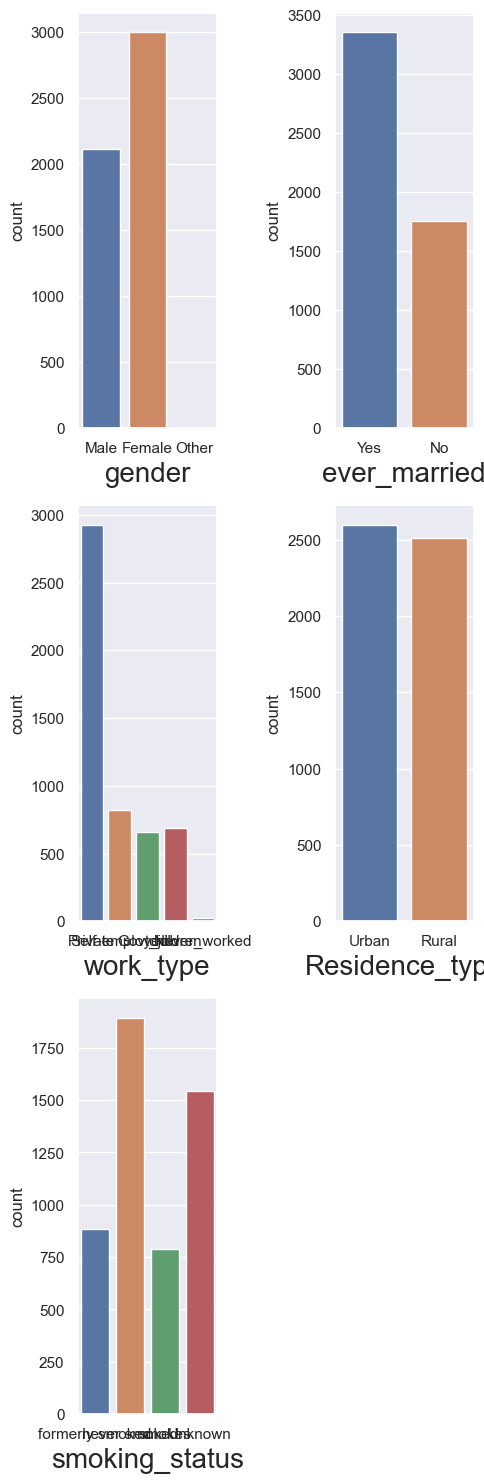

In [14]:
plt.figure(figsize=(5, 15))
plotnumber = 1

for column in Categorical.columns:
    if plotnumber <= 6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.countplot(data=Categorical, x=column)
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()


EDA Analysis

In [15]:
df = df.drop(['id'],axis=1)

In [16]:
# Checking the values in the gender column
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<Axes: ylabel='count'>

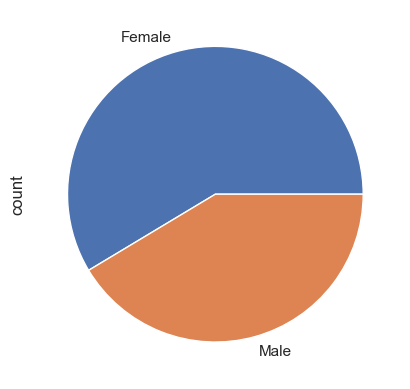

In [17]:
# Removing the 'other' gender instance inorder to reduce the dimension
df['gender'] = df['gender'].replace('Other','Female')
# plotting a pie chart to see the gender count distribution
df['gender'].value_counts().plot(kind="pie")

Target feature - Stroke
Stroke analysis

In [18]:
# Value count in the stroke attribute
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke'>

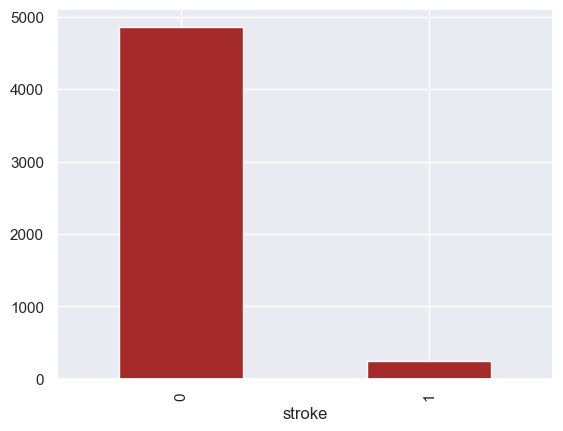

In [20]:
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar",color = "brown")

In [21]:
print("Percentage of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

Percentage of people who actualy got a stroke :  4.9


Work type Analysis

In [22]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: ylabel='count'>

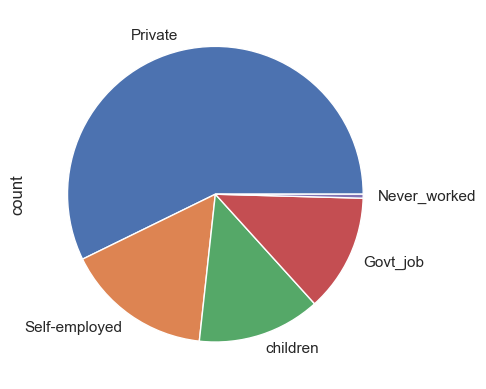

In [23]:
df['work_type'].value_counts().plot(kind="pie")

Residence type Analysis

In [24]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: ylabel='count'>

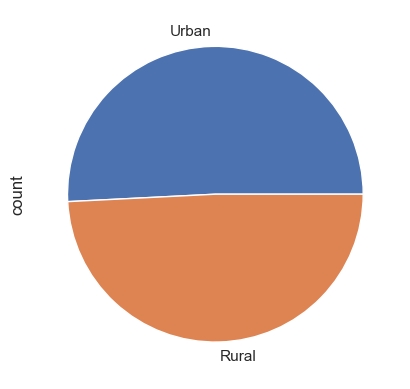

In [25]:
df['Residence_type'].value_counts().plot(kind="pie")

BMI analysis

In [26]:
df['bmi'].isnull().sum()

201

<Axes: xlabel='bmi', ylabel='Count'>

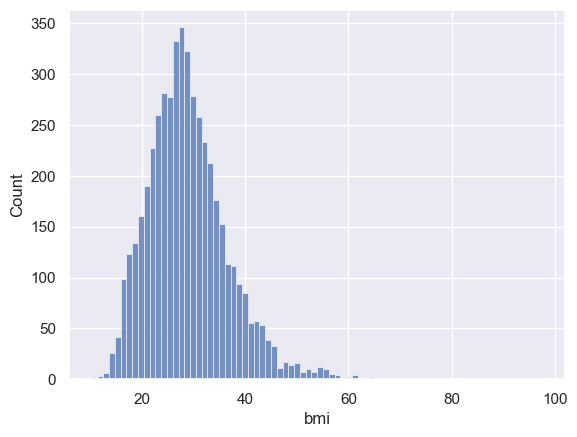

In [27]:
# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])

Hyper-tension Analysis

<Axes: xlabel='hypertension'>

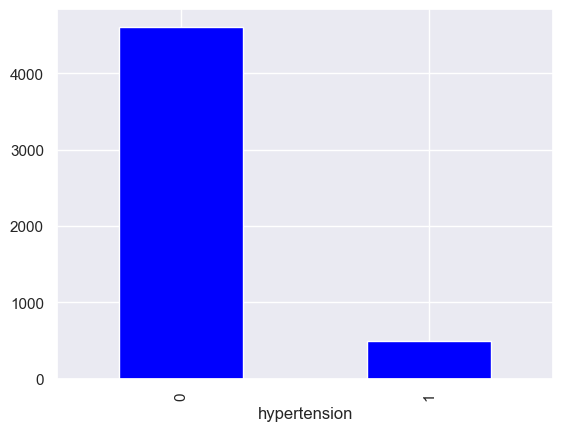

In [28]:
df['hypertension'].value_counts().plot(kind="bar",color = "blue")

<Axes: xlabel='age', ylabel='Count'>

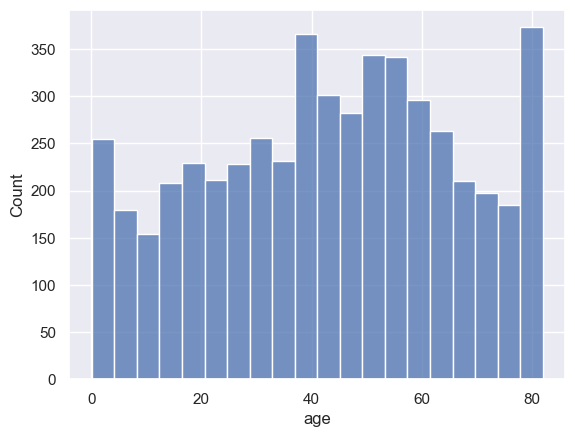

In [29]:
sns.histplot(data=df['age'])

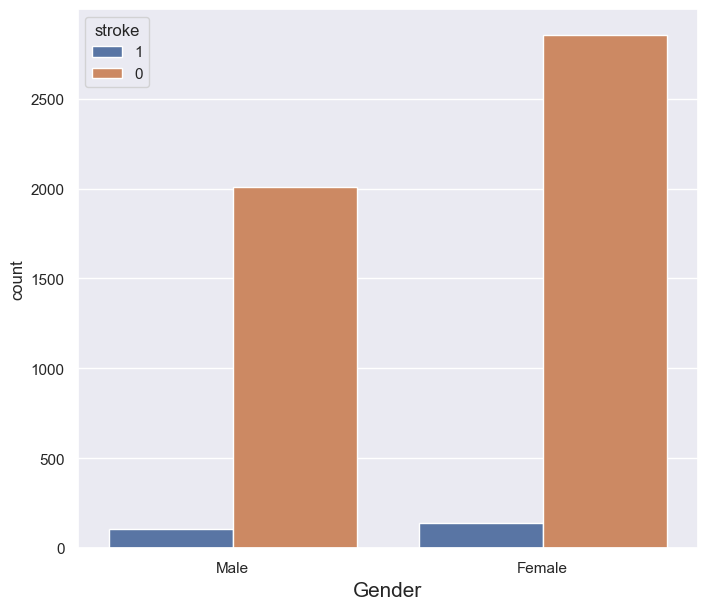

In [30]:
df['stroke'] = df['stroke'].astype(str)

plt.figure(figsize=(8,7))
sns.countplot(data=df, x='gender', hue='stroke')
plt.xlabel("Gender", fontsize=15)
plt.show()


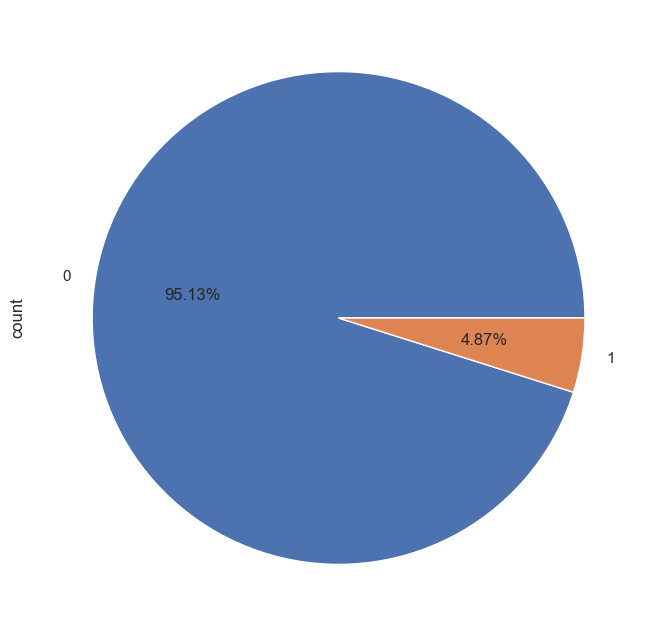

In [31]:
plt.figure(figsize=(8,8))
df['stroke'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [32]:
#Ever married
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

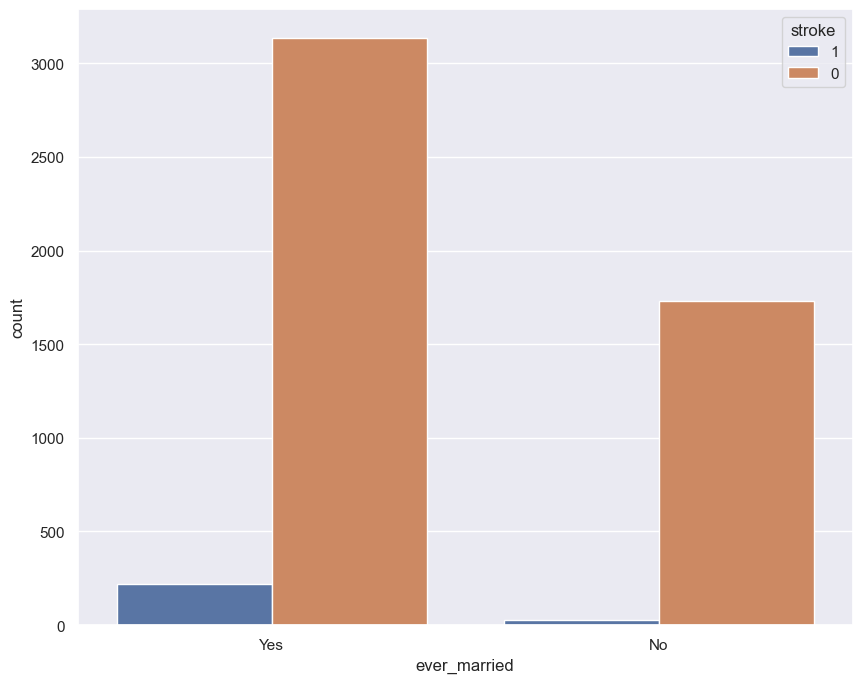

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='ever_married',hue='stroke')
plt.show()

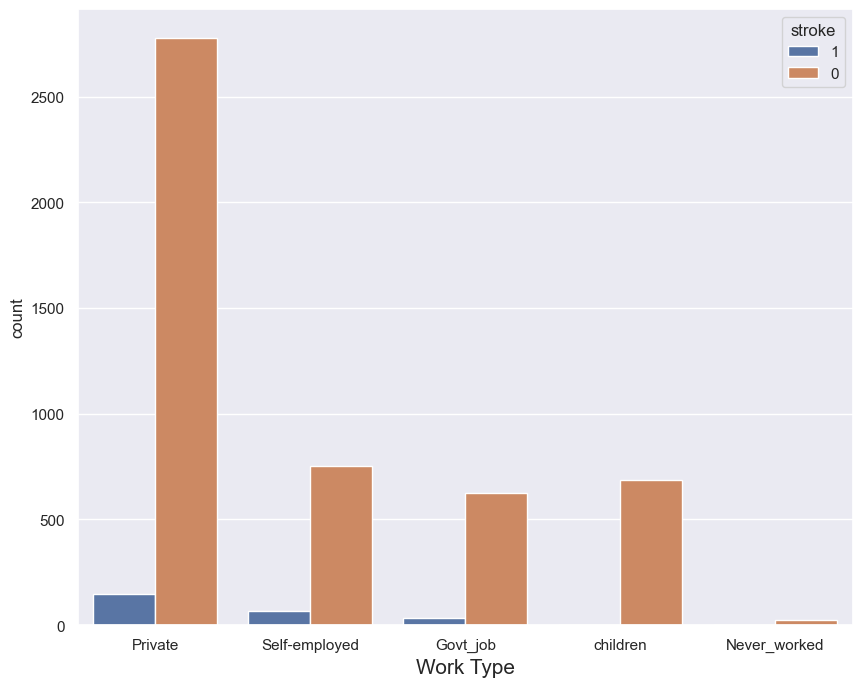

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='work_type',hue='stroke')
plt.xlabel("Work Type",fontsize = 15)
plt.show()

In [34]:
lr = LabelEncoder

In [35]:
from sklearn.preprocessing import LabelEncoder
cols = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']
le = LabelEncoder()
for col in cols:
    Categorical[col] = le.fit_transform(Categorical[col])

In [36]:
Categorical.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2


In [37]:
Num_col = [colm for colm in df.columns if df[colm].dtype != "O" ]
Num_col

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [38]:
df[Num_col].head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,NaN
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0


In [39]:
df[Num_col].isnull().sum()

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
dtype: int64

In [40]:
df[Num_col].shape

(5110, 5)

In [41]:
Numerical = df[Num_col]
Numerical.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,NaN
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0


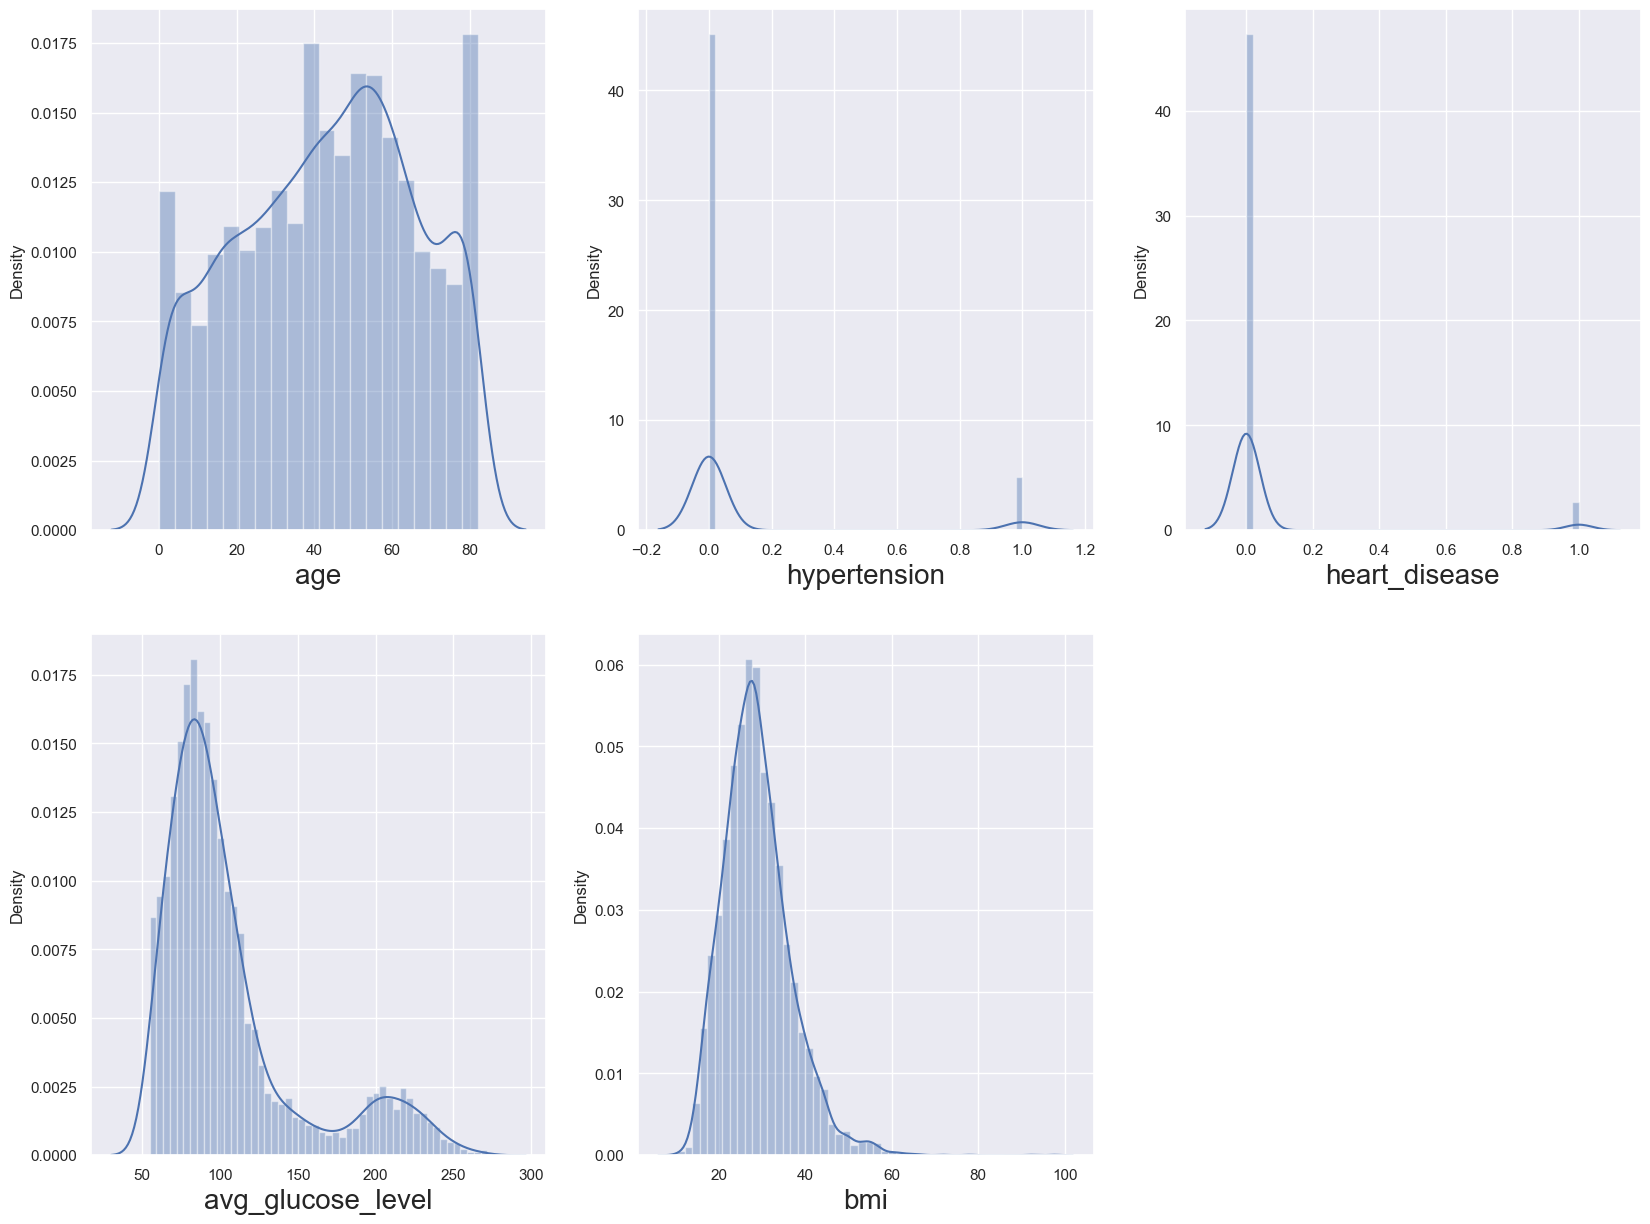

In [42]:
plt.figure(figsize=(20,23))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

In [43]:
Numerical.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

In [44]:
Numerical["bmi"] = Numerical["bmi"].fillna(Numerical["bmi"].mean())

In [45]:
Numerical.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
dtype: int64

In [46]:
Numerical["avg_glucose_level"] = np.log(Numerical["avg_glucose_level"])
Numerical["bmi"] = np.log(Numerical["bmi"])

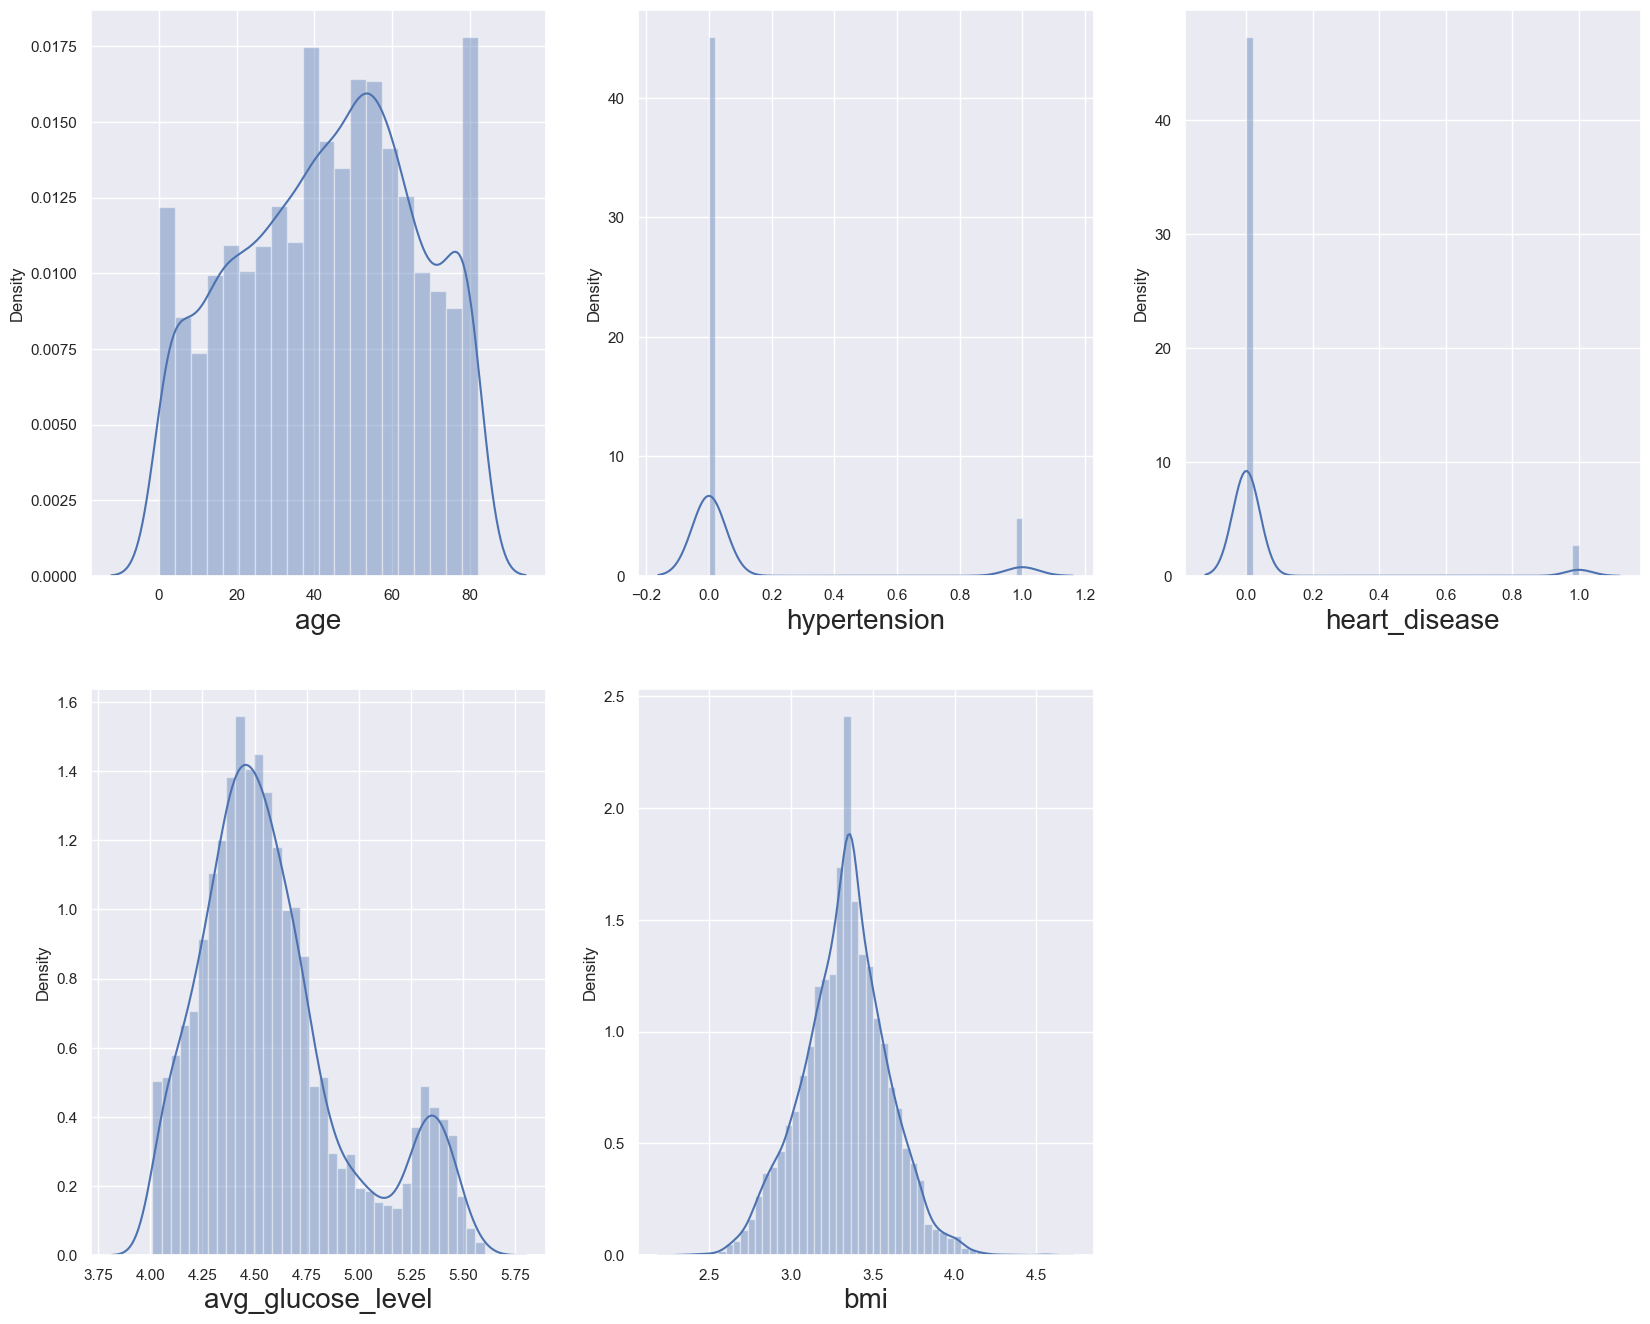

In [47]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

In [49]:
Numerical.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,5.432367,3.600048
1,61.0,0,0,5.309307,3.363608
2,80.0,0,1,4.662684,3.481240
3,49.0,0,0,5.143008,3.538057
4,79.0,1,0,5.159745,3.178054


In [50]:
print(df.dtypes)


gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object


In [51]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')


In [52]:
df.groupby('gender')[['age', 'stroke']].mean()


,age,stroke
gender,,
Female,43.751466,0.047078
Male,42.483385,0.051064


In [53]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

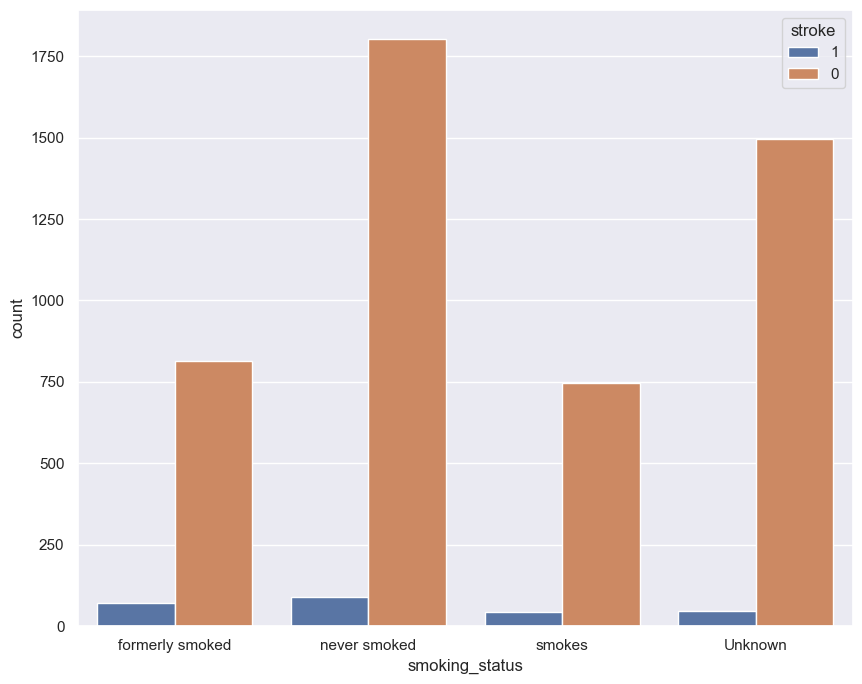

In [56]:
df['stroke'] = df['stroke'].astype(str)

plt.figure(figsize=(10,8))
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.show()


<Axes: >

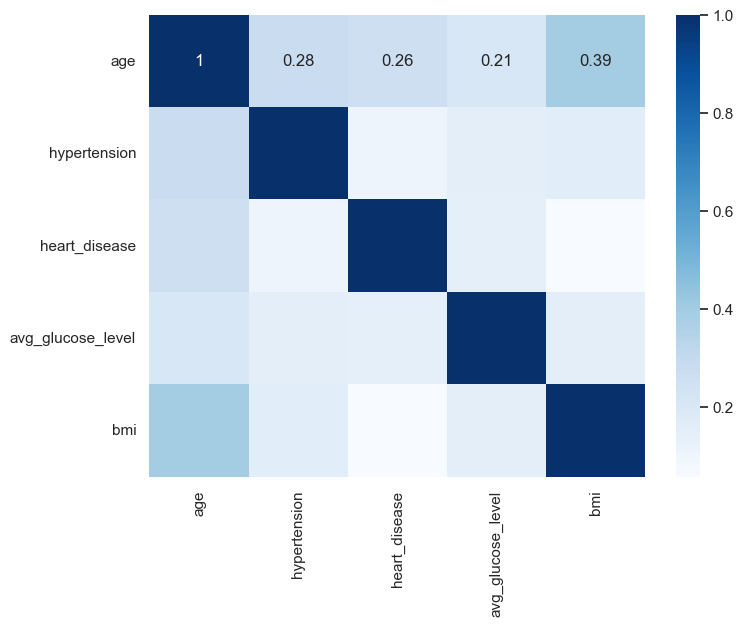

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

In [55]:
data = pd.concat([Categorical,Numerical],axis=1)
data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,1,67.0,0,1,5.432367,3.600048
1,0,1,3,0,2,61.0,0,0,5.309307,3.363608
2,1,1,2,0,2,80.0,0,1,4.662684,3.481240
3,0,1,2,1,3,49.0,0,0,5.143008,3.538057
4,0,1,3,0,2,79.0,1,0,5.159745,3.178054


In [56]:
data.describe()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,0.656164,2.167710,0.508023,1.376908,43.226614,0.097456,0.054012,4.592465,3.329807
std,0.493044,0.475034,1.090293,0.499985,1.071534,22.612647,0.296607,0.226063,0.361985,0.259888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,4.009513,2.332144
25%,0.000000,0.000000,2.000000,0.000000,0.000000,25.000000,0.000000,0.000000,4.346982,3.169686
50%,0.000000,1.000000,2.000000,1.000000,2.000000,45.000000,0.000000,0.000000,4.520538,3.346389
75%,1.000000,1.000000,3.000000,1.000000,2.000000,61.000000,0.000000,0.000000,4.736988,3.490429
max,2.000000,1.000000,4.000000,1.000000,3.000000,82.000000,1.000000,1.000000,5.604846,4.580877


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   ever_married       5110 non-null   int32  
 2   work_type          5110 non-null   int32  
 3   Residence_type     5110 non-null   int32  
 4   smoking_status     5110 non-null   int32  
 5   age                5110 non-null   float64
 6   hypertension       5110 non-null   int64  
 7   heart_disease      5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
dtypes: float64(3), int32(5), int64(2)
memory usage: 299.5 KB


In [58]:
data.shape

(5110, 10)

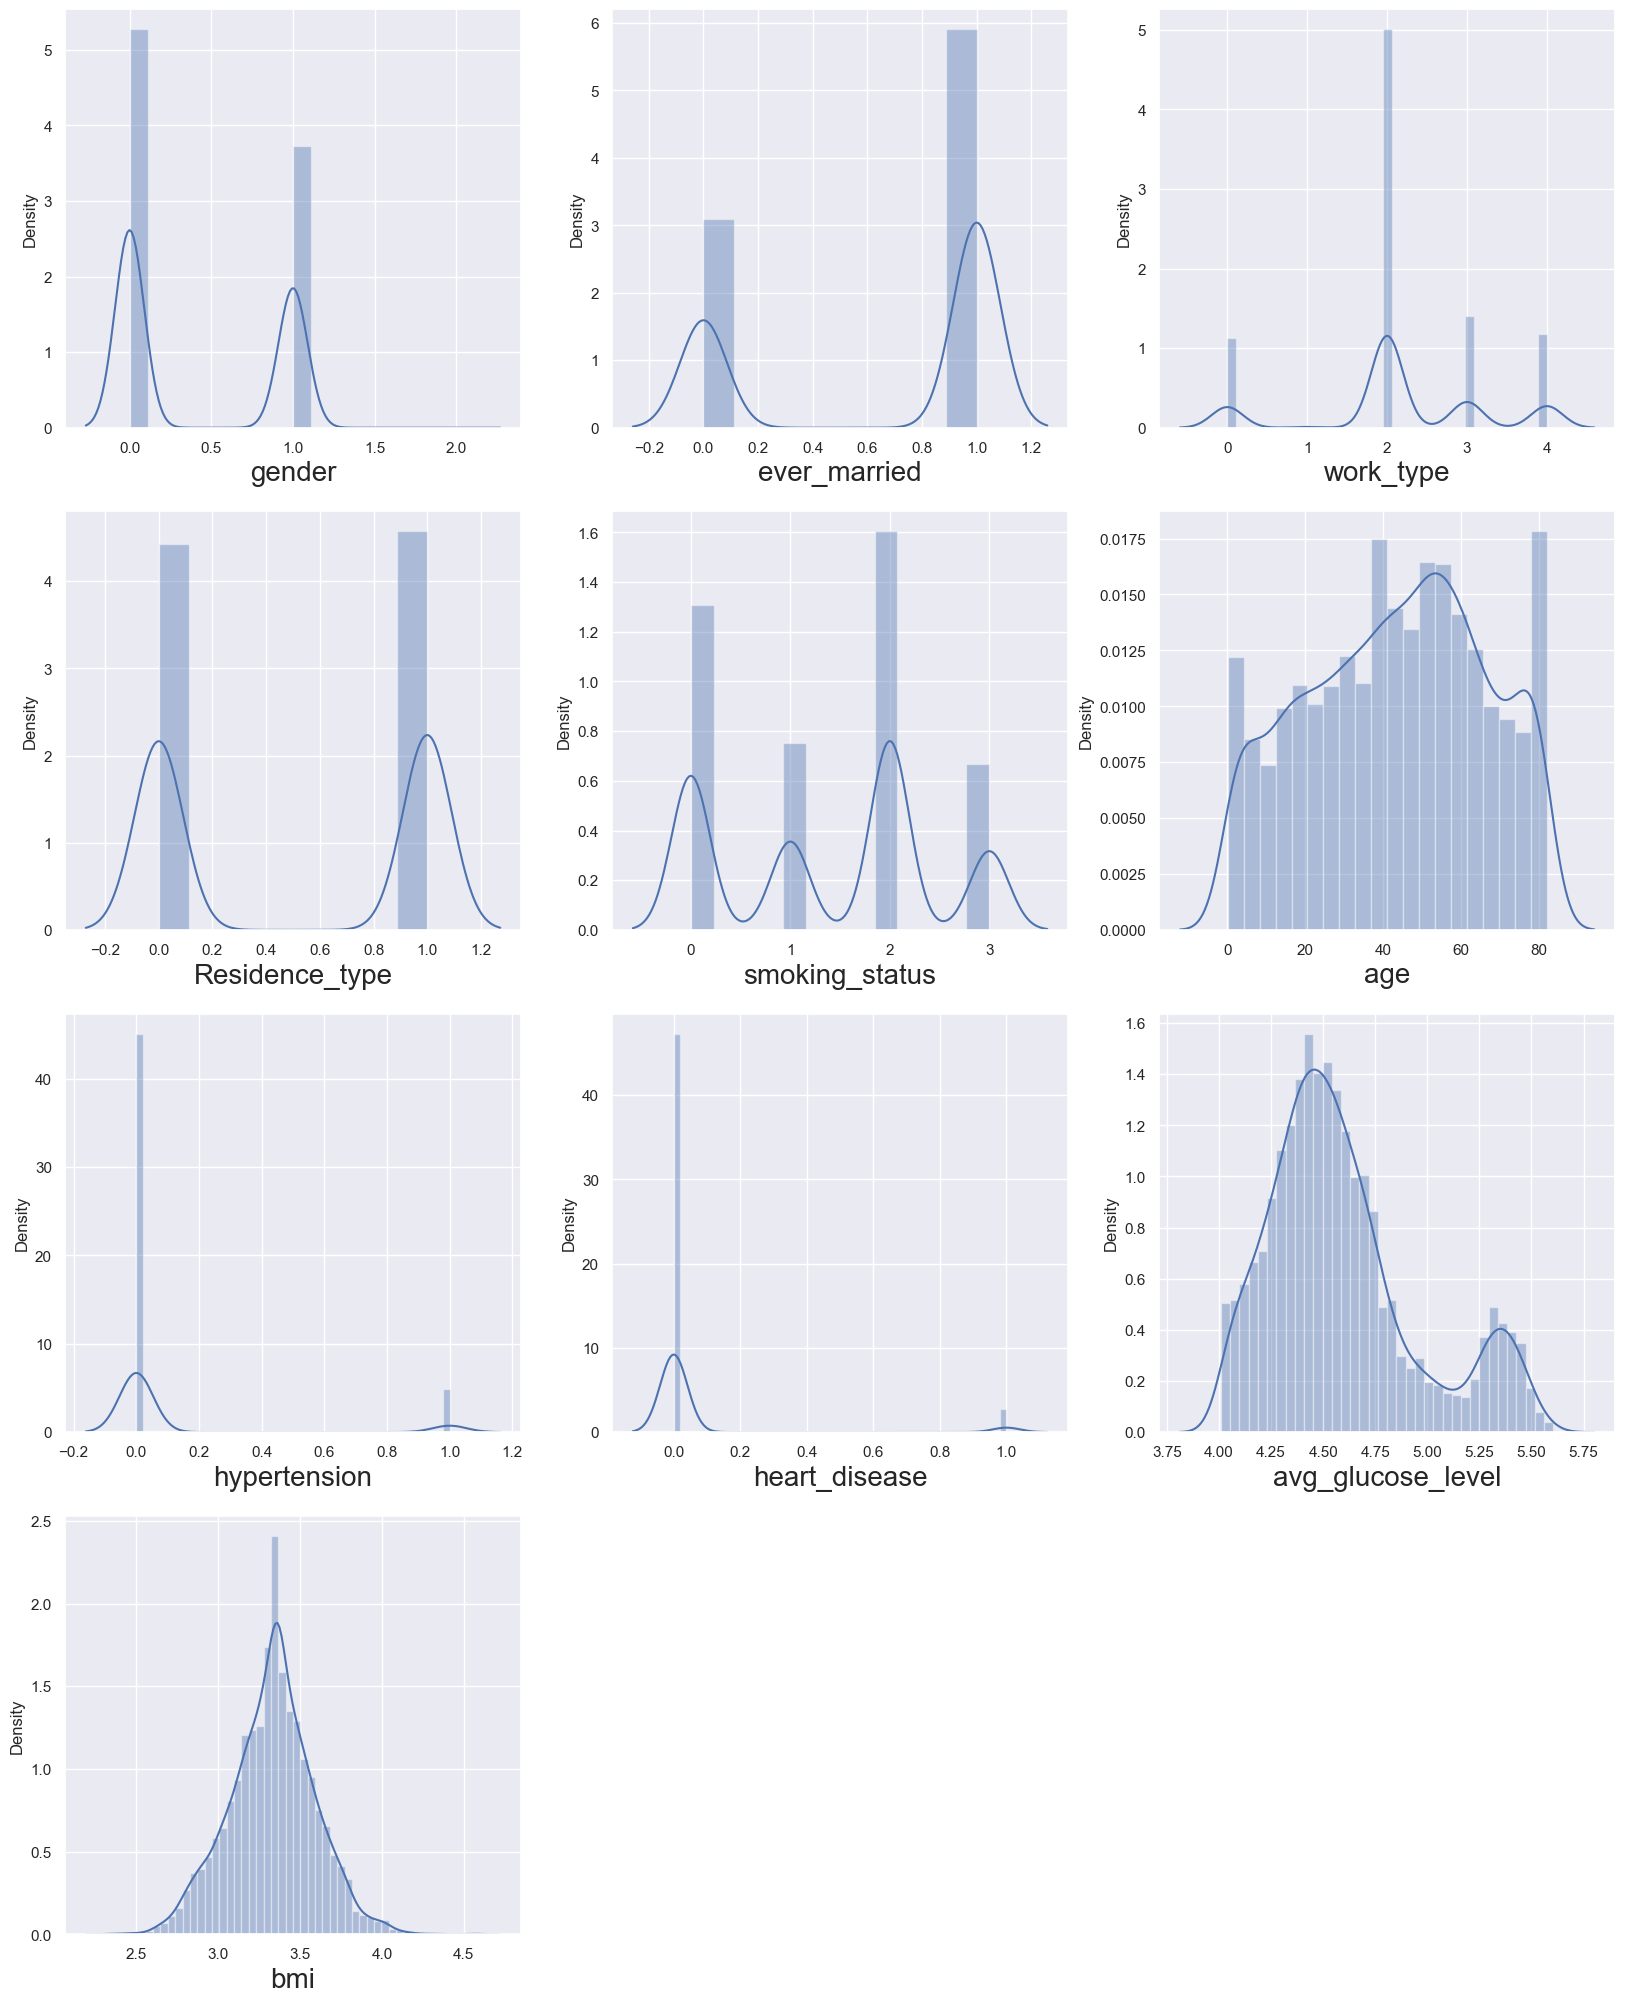

In [59]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
  if plotnumber <= 15:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

In [60]:
print(data.columns)


Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'age', 'hypertension', 'heart_disease',
       'avg_glucose_level', 'bmi'],
      dtype='object')


In [61]:
X = data.copy()
X['stroke'] = df['stroke']  # assuming df still has it
y = X['stroke']
X = X.drop(columns=['stroke'])


In [62]:
X = df.drop(columns=["stroke"])
y = df["stroke"]


In [63]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [64]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder

X_copy = X.copy()
label_encoders = {}

for col in X_copy.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_copy[col] = le.fit_transform(X_copy[col])
    label_encoders[col] = le  # Save encoders if needed later

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_copy)


In [66]:
X_scaled

array([[ 1.18998977,  1.05143428, -0.32860186, ...,  2.70637544,
         0.98134488, -0.35178071],
       [-0.84034336,  0.78607007, -0.32860186, ...,  2.12155854,
                nan,  0.58155233],
       [ 1.18998977,  1.62639008, -0.32860186, ..., -0.0050283 ,
         0.45926914,  0.58155233],
       ...,
       [-0.84034336, -0.36384151, -0.32860186, ..., -0.51144264,
         0.21733161,  0.58155233],
       [ 1.18998977,  0.34379639, -0.32860186, ...,  1.32825706,
        -0.41934612, -0.35178071],
       [-0.84034336,  0.03420481, -0.32860186, ..., -0.46086746,
        -0.34294479, -1.28511375]])

In [67]:
import numpy as np

print(np.isnan(X_scaled).sum())  # Count of NaNs per column
print(np.isinf(X_scaled).sum())  # Count of infs per column


201
0


In [68]:
# Step 1: Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 2: Fill missing values (e.g., with mean)
X_encoded = X_encoded.fillna(X_encoded.mean())

# Step 3: Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 4: Check for NaNs or infs (should be 0 now)
print(np.isnan(X_scaled).sum())  # Should print 0
print(np.isinf(X_scaled).sum())  # Should print 0

# Step 5: Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X_encoded.columns

print(vif)


0
0
         VIF                        Features
0   2.868729                             age
1   1.118625                    hypertension
2   1.114723                   heart_disease
3   1.108163               avg_glucose_level
4   1.300629                             bmi
5   1.027838                     gender_Male
6   1.987510                ever_married_Yes
7   1.058535          work_type_Never_worked
8   2.363983               work_type_Private
9   1.937589         work_type_Self-employed
10  3.237109              work_type_children
11  1.002566            Residence_type_Urban
12  1.600946  smoking_status_formerly smoked
13  1.797652     smoking_status_never smoked
14  1.534492           smoking_status_smokes


In [69]:
vif

,VIF,Features
0,2.868729,age
1,1.118625,hypertension
2,1.114723,heart_disease
3,1.108163,avg_glucose_level
4,1.300629,bmi
5,1.027838,gender_Male
6,1.987510,ever_married_Yes
7,1.058535,work_type_Never_worked
8,2.363983,work_type_Private
9,1.937589,work_type_Self-employed


In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [71]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (4088, 10)
Shape of X Test:  (1022, 10)
Shape of y Train:  (4088,)
Shape of y Test:  (1022,)


In [72]:
def ML_model(model):
  #model = LogisticRegression()
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
# print(y_pred)

# Accuracy,F1_Score, Precision_Score,Recall_Score
  print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
  print()
  print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
  print()
  print("F1 Score: ", (f1_score(y_test,y_pred)))
  print("Precision Score: ", (precision_score(y_test,y_pred)))
  print("Recall Score :", (recall_score(y_test,y_pred)))
  print("AUC Score :", roc_auc_score(y_test,y_pred))
  print("\n")
#Entire Report of the Model
  print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
  plt.show()

In [73]:
y = df["stroke"]


In [74]:
y = df["stroke"].astype(int)  # Make sure labels are integers


In [75]:
print(y.dtype)        # should be int64
print(y.unique())     # should show [0 1]


int32
[1 0]


In [76]:
X = df.drop(columns=["stroke"])
y = df["stroke"].astype(int)  # Ensure correct type

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Fill any missing values
X_encoded = X_encoded.fillna(X_encoded.mean())

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now this will work:
classifier = ML_model(LogisticRegression())


Confusion Matrix :
  [[960   0]
 [ 62   0]]

Accuracy_Score:  93.933 %

F1 Score:  0.0
Precision Score:  0.0
Recall Score : 0.0
AUC Score : 0.5


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [77]:
ML_model(DecisionTreeClassifier())

Confusion Matrix :
  [[917  43]
 [ 48  14]]

Accuracy_Score:  91.096 %

F1 Score:  0.2352941176470588
Precision Score:  0.24561403508771928
Recall Score : 0.22580645161290322
AUC Score : 0.5905073924731182


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.25      0.23      0.24        62

    accuracy                           0.91      1022
   macro avg       0.60      0.59      0.59      1022
weighted avg       0.91      0.91      0.91      1022



In [78]:
ML_model(RandomForestClassifier())

Confusion Matrix :
  [[959   1]
 [ 62   0]]

Accuracy_Score:  93.836 %

F1 Score:  0.0
Precision Score:  0.0
Recall Score : 0.0
AUC Score : 0.49947916666666664


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [79]:
#importing the KNN Classifier module
from sklearn.neighbors import KNeighborsClassifier
# Libraries for calculating performance metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
# 2 neighbours because of the 2 classes
knn = KNeighborsClassifier(n_neighbors = 2)
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
confusion_matrix(y_test, y_pred_knn)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

Accuracy: 0.9373776908023483
ROC AUC Score: 0.5103158602150536


In [80]:
# Import the required libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Create the SVM classifier with probability estimates enabled
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict class labels
y_pred_svm = svm_model.predict(X_test)

# Predict probabilities for ROC AUC
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_svm))


Confusion Matrix:
[[960   0]
 [ 62   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy: 0.9393346379647749
ROC AUC Score: 0.6518817204301075


In [81]:
# Save the Model
import pickle
# saving the model to the local file system
filename = 'final_model.pickle'
pickle.dump(classifier, open(filename, 'wb'))

In [83]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Train KNN
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

# Save it as model.joblib
joblib.dump(model, 'model.joblib')

['model.joblib']